In [28]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [29]:
def f(x1,x2):
    return 1/(1+np.sqrt(x1*x1 + x2*x2))


In [30]:
np.random.seed(200)
x1 = np.random.rand(10000)
x2 = np.random.rand(10000)
y = f(x1,x2)
train = np.vstack([x1,x2])
# train = np.vstack([train,y])
# train = np.random.choice(train,5000, replace = False)
train_x, test_x, train_y, test_y = train_test_split(train.T, y, test_size=0.5, random_state=42)
#plt.plot(test_y,linestyle = "-",color='r', alpha = 0.5)
train_x_tensor = torch.from_numpy(train_x.astype(np.float32))
train_y_tensor = torch.from_numpy(train_y.astype(np.float32)).unsqueeze(1)
test_x_tensor = torch.from_numpy(test_x.astype(np.float32))
test_y_tensor = torch.from_numpy(test_y.astype(np.float32)).unsqueeze(1)
print(train_y_tensor.shape)
print(train_x_tensor.shape)

torch.Size([5000, 1])
torch.Size([5000, 2])


In [31]:
class Net(torch.nn.Module):
    def __init__(self,m):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(2,m)
        self.fc2 = torch.nn.Linear(m,1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        y_pred = self.sigmoid(self.fc1(x))
        y_pred = self.sigmoid(self.fc2(y_pred))
#         print(x.shape)
        return y_pred
    
model = Net(10)

In [32]:
model(train_x_tensor).shape
train_y_tensor.shape

torch.Size([5000, 1])

In [33]:
criterion = torch.nn.MSELoss(reduction ='mean')
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
epoch_lst = []
loss_item = []

In [34]:
def train(train_num,inputs,target):
    epsilon = 0.01
    for epoch in range(train_num):

        #forward
        
        outputs = model(inputs)
        loss = criterion(outputs, target)
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if(epoch % 100 == 0):#5000轮测试一次然后输出当前的训练误差与测试误差
            test_loss = test(test_x_tensor, test_y_tensor)
            print('epoch:%d train_loss:%f test_loss:%f' %(epoch,loss.item(),test_loss.item()) )
            epoch_lst.append(epoch)
            loss_item.append(loss.item())
        if loss < epsilon:
            print(epoch,loss.item())
            loss = epsilon
            torch.save(model.state_dict(),'./model.pt')
            print("loss < epsilon")
            break;

In [35]:
def test(inputs,target):
    outputs = model(inputs)
    loss = criterion(outputs, target)
    return loss

epoch:0 train_loss:0.024046 test_loss:0.023733
epoch:100 train_loss:0.020797 test_loss:0.020529
epoch:200 train_loss:0.018229 test_loss:0.018001
epoch:300 train_loss:0.016248 test_loss:0.016056
epoch:400 train_loss:0.014757 test_loss:0.014599
epoch:500 train_loss:0.013667 test_loss:0.013537
epoch:600 train_loss:0.012890 test_loss:0.012785
epoch:700 train_loss:0.012347 test_loss:0.012262
epoch:800 train_loss:0.011968 test_loss:0.011901
epoch:900 train_loss:0.011701 test_loss:0.011647
epoch:1000 train_loss:0.011505 test_loss:0.011462
epoch:1100 train_loss:0.011356 test_loss:0.011320
epoch:1200 train_loss:0.011235 test_loss:0.011205
epoch:1300 train_loss:0.011131 test_loss:0.011106
epoch:1400 train_loss:0.011038 test_loss:0.011017
epoch:1500 train_loss:0.010950 test_loss:0.010932
epoch:1600 train_loss:0.010866 test_loss:0.010849
epoch:1700 train_loss:0.010782 test_loss:0.010767
epoch:1800 train_loss:0.010698 test_loss:0.010683
epoch:1900 train_loss:0.010613 test_loss:0.010599
epoch:2000 t

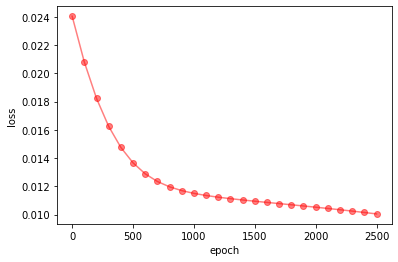

In [36]:
if __name__ == '__main__':
    train(1000000,train_x_tensor, train_y_tensor)
    plt.plot(epoch_lst, loss_item,linestyle = "-",marker="o",color='r', alpha = 0.5)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()